In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? **30**
* How many observations have a 'mean area' of greater than 700? **171**
* How many participants tested `Malignant`? **212**
* How many participants tested `Benign`? **357**

In [ ]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
print(dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
import numpy as np
import pandas as pd
import sklearn 

### Creating Pandas Dataframe ###
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = dataset.target                  # Insert 'target' column in dataframe

# Finding no. of features       
print("Number of Features:", len(dataset.feature_names))

### Finding observations that have a 'mean area' of greater than 700 ###
print('observations with mean area of greater than 700:',len(df[{'mean area'}][df['mean area'] > 700]))

### Finding Participants who tested Malignant ###
print("Participants who tested Malignant :", len(df[{'target'}][df['target'] == 0]))

### Finding Participants who tested Benign ###
print("Participants who tested Benign :", len(df[{'target'}][df['target'] == 1]))

df

Number of Features: 30
observations with mean area of greater than 700: 171
Participants who tested Malignant : 212
Participants who tested Benign : 357


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split

X_train_data,X_test_data,Y_train_labels,Y_test_labels = train_test_split(df,df['target'],test_size=0.3,random_state=0)

#verify shape of data
print(X_train_data.shape, Y_train_labels.shape)
print(X_test_data.shape, Y_test_labels.shape)

(398, 31) (398,)
(171, 31) (171,)


In [ ]:
# verify the training data and labels are correct
print(X_train_data)
print(Y_train_labels)

     mean radius  mean texture  ...  worst fractal dimension  target
478       11.490         14.59  ...                  0.09180       1
303       10.490         18.61  ...                  0.07842       1
155       12.250         17.94  ...                  0.08132       1
186       18.310         18.58  ...                  0.06938       0
101        6.981         13.43  ...                  0.09382       1
..           ...           ...  ...                      ...     ...
277       18.810         19.98  ...                  0.05737       0
9         12.460         24.04  ...                  0.20750       0
359        9.436         18.32  ...                  0.08136       1
192        9.720         18.22  ...                  0.06559       1
559       11.510         23.93  ...                  0.08732       1

[398 rows x 31 columns]
478    1
303    1
155    1
186    0
101    1
      ..
277    0
9      0
359    1
192    1
559    1
Name: target, Length: 398, dtype: int64


In [ ]:
# Removing Identifiers from data
X_train_data = X_train_data.drop(columns = ['target'])
X_test_data = X_test_data.drop(columns = ['target'])

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




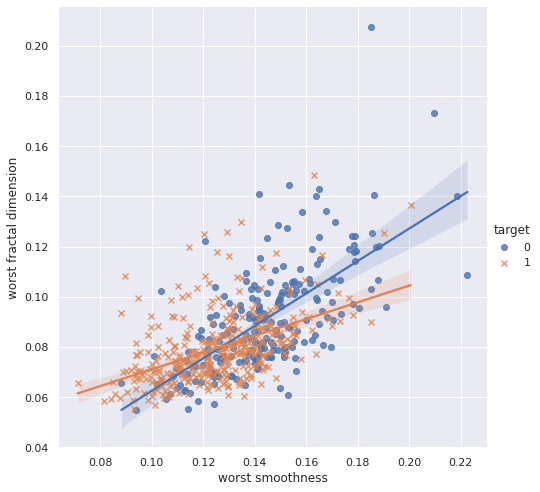

In [ ]:
import seaborn as sns; sns.set_theme(color_codes=True)

### Plotting worst smoothness VS worst fractal dimension ###
g = sns.lmplot(x="worst smoothness", y="worst fractal dimension",hue='target',markers = ["o" , "x"], 
               height=7, aspect=1,data=df)

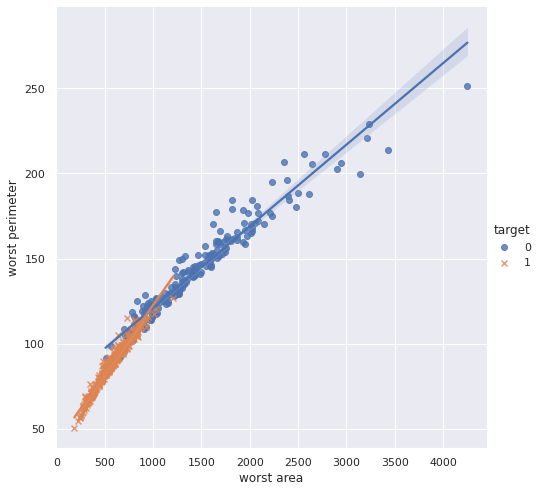

In [ ]:
### Plotting worst area VS worst perimeter dimension ###
g = sns.lmplot(x="worst area", y="worst perimeter",hue='target',markers=["o" , "x"],
               height=7, aspect=1,x_jitter=0.5,data=df)

In [ ]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#drop target column before Normalize
df1 = df.drop('target',axis=1)

# Normalize
scaler.fit(df1)
df1_standardized = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

#Add target column after Normalize
df1_standardized['target'] = dataset.target

df1_standardized

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0


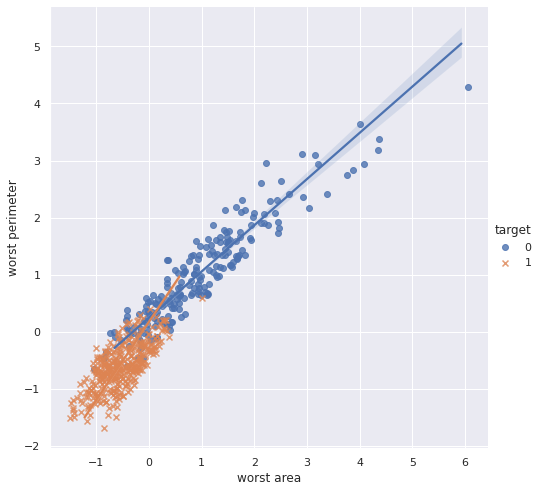

In [ ]:
### Plotting worst area VS worst perimeter dimension from normalized/Standardized data###
g = sns.lmplot(x="worst area", y="worst perimeter",hue='target', data=df1_standardized,markers=["o" , "x"],
                height=7, aspect=1,x_jitter=0.5)

**Answer: It is observed that after Standardization features are centered around Zero with unit Std deviation. 
Data with two different scale are difficult to interpret. Standardization helps to normalize the data that have different units and makes it easier to interpret and have meaningful insight.**

## Part 2: KNN Classifier without Standardization
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




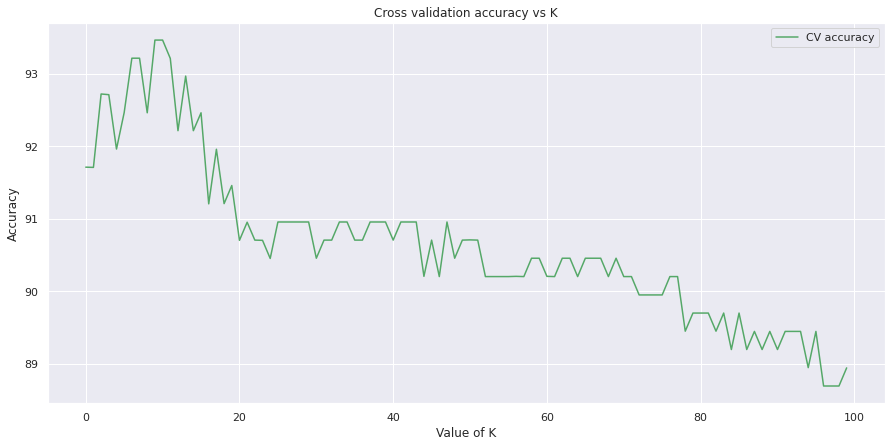

Max Cross validation accuracy is  93.46518987341771 % at best K : 9


In [ ]:
### YOUR CODE HERE ###
from sklearn import neighbors
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

#Dictionary for all values of K
K_val = {'n_neighbors':np.arange(1,101)}

CV1_test_scores =[]
CV1_train_scores =[]
for K_val in range(1,101):
  knn_CV1 = neighbors.KNeighborsClassifier(n_neighbors=K_val)
  scores = cross_validate(knn_CV1,X_train_data,Y_train_labels,cv=5,return_train_score=True)
  CV1_test_scores.append(scores['test_score'].mean()*100)
  CV1_train_scores.append(scores['train_score'].mean()*100)

max_test_index = np.where(CV1_test_scores == max(CV1_test_scores))[0][0]
max_train_index = np.where(CV1_train_scores == max(CV1_train_scores))[0][0]

import matplotlib.pyplot as plt

X_acc_score = np.array(CV1_acc_scores)
y_K_val = np.arange(K_val)

fig = plt.figure(figsize=(15, 7))
plt.plot(y_K_val, X_acc_score,"-g",label="CV accuracy")

plt.legend()
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Cross validation accuracy vs K");
plt.show()

print("Max Cross validation accuracy is ", max(CV1_test_scores),'%' , "at best K :", max_test_index)


**Answer 2 : Max Cross validation accuracy is  93.465 % at best K : 9**

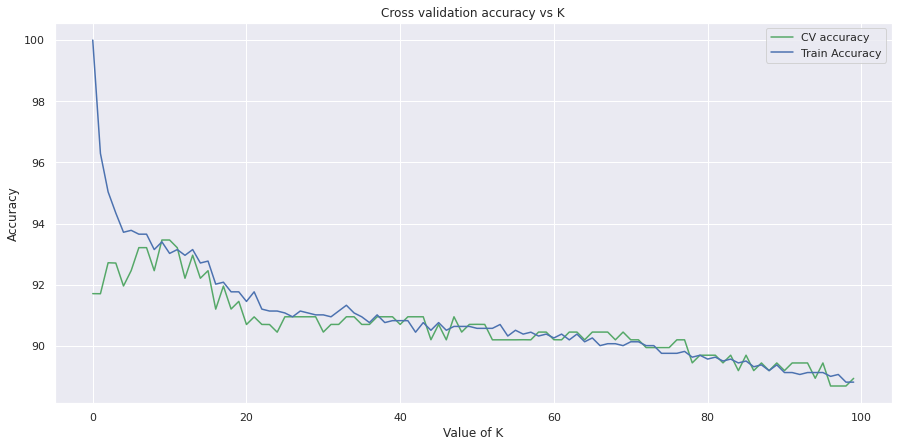

In [ ]:
import matplotlib.pyplot as plt

X_acc_score = np.array(CV1_acc_scores)
X_train_score = np.array(CV1_train_scores)
y_K_val = np.arange(K_val)

fig = plt.figure(figsize=(15, 7))
plt.plot(y_K_val, X_acc_score,"-g",label="CV accuracy")
plt.plot(y_K_val, X_train_score,"-b",label="Train Accuracy")

plt.legend()
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Cross validation accuracy vs K");
plt.show()

3. **Values of K between 0 to 5 is overfitting and K between 20 to 100 gives underfitting values**

## Part 3: Feature Selection
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use the following link to get familiar with extracting the feature impotance order of machine learning algorithms in Python: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to remove another feature. To do that we fit a new decision tree to the remaining features and identify the least important feature. 


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[3]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Each time, removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 1, fit a new tree on the reduced dataset and follow all the steps until you meet the stop condition. 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
def Feature_selector (X_train , Y_train , tr=0.95):
### YOUR CODE HERE ###
    
    from sklearn import tree
    mean_cv_acc_list = []
    k_neighbor_list = []
    feature_list = []
    fea_X_train_data = X_train
    fea_Y_train_labels = Y_train
    Number_of_features_left = []
    
    
  ### Training model with all features ###

    scores_cv1 = []                                            
    scores_cv1_test = []                                 # Empty list for Cross validation accuracy
                             
    for K_val in range(1,101):
      knn_CV1 = neighbors.KNeighborsClassifier(n_neighbors=K_val)
      scores_cv1=cross_validate(knn_CV1,fea_X_train_data,fea_Y_train_labels,cv=5,return_train_score=True)
      scores_cv1_test.append(scores_cv1['test_score'].mean()*100)
      
    ## Max cross validation accuracy with all features ##
    Max_cv_accuracy = max(scores_cv1_test)
    K_val_all = np.where(scores_cv1_test==max(scores_cv1_test))[0][0]
    print("Maximum Cross validation accuracy using all features is:", Max_cv_accuracy,"%" ,'for K:',K_val_all)
    
    current_cv_accuracy = 100                    # Starting with 100%, later on it will be update with value of max cross validation acc. after each iteration#    
  
    while fea_X_train_data.columns.size > 1 and current_cv_accuracy >= tr * Max_cv_accuracy:   # Continues when atleast 1 feature is left and accuracy is more than threshold 
        
        dt_classifier = tree.DecisionTreeClassifier(random_state = 0)
        dt_classifier.fit(fea_X_train_data, fea_Y_train_labels)
        feature_importances = pd.Series(dt_classifier.feature_importances_, index=fea_X_train_data.columns).sort_values(ascending=True) #Panda series with feature importance sorted in ascending
        dt_least_important_feature = feature_importances.index[0]
        feature_list.append(dt_least_important_feature)
        
        
        fea_X_train_data=fea_X_train_data.drop(columns = [dt_least_important_feature])        
        scores_cv2 = []
        scores_cv2_test = []
        
        for K_loop in range(1,101):
            knn_loop = neighbors.KNeighborsClassifier(n_neighbors = K_loop)          #set K neighbor as loop index
            scores_cv2=cross_validate(knn_loop,fea_X_train_data,fea_Y_train_labels,cv=5,return_train_score=True)
            scores_cv2_test.append(scores_cv2['test_score'].mean()*100)
        
        current_cv_accuracy = max(scores_cv2_test)
        k_val = np.where(scores_cv2_test == max(scores_cv2_test))[0][0]      
        mean_cv_acc_list.append(current_cv_accuracy)
        k_neighbor_list.append(k_val)
        Features_left = (fea_X_train_data.columns.size)
        Number_of_features_left.append((fea_X_train_data.columns.size))

        print("After removing feature :",dt_least_important_feature," , highest cross-validation accuracy is:", current_cv_accuracy, " % ,",
              "for K :", k_val," and no. of feature left ",Features_left)
        
    return mean_cv_acc_list,k_neighbor_list,feature_list,Number_of_features_left

In [ ]:
# Using feature_selector in Training data set

Train_1 = Feature_selector (X_train_data,Y_train_labels,0.95)

Maximum Cross validation accuracy using all features is: 93.46518987341771 % for K: 9
After removing feature : mean radius  , highest cross-validation accuracy is: 93.46518987341771  % , for K : 9  and no. of feature left  29
After removing feature : mean texture  , highest cross-validation accuracy is: 93.46518987341771  % , for K : 9  and no. of feature left  28
After removing feature : compactness error  , highest cross-validation accuracy is: 93.46518987341771  % , for K : 9  and no. of feature left  27
After removing feature : concavity error  , highest cross-validation accuracy is: 93.46518987341771  % , for K : 9  and no. of feature left  26
After removing feature : smoothness error  , highest cross-validation accuracy is: 93.46518987341771  % , for K : 9  and no. of feature left  25
After removing feature : mean perimeter  , highest cross-validation accuracy is: 93.21518987341773  % , for K : 6  and no. of feature left  24
After removing feature : concave points error  , highes

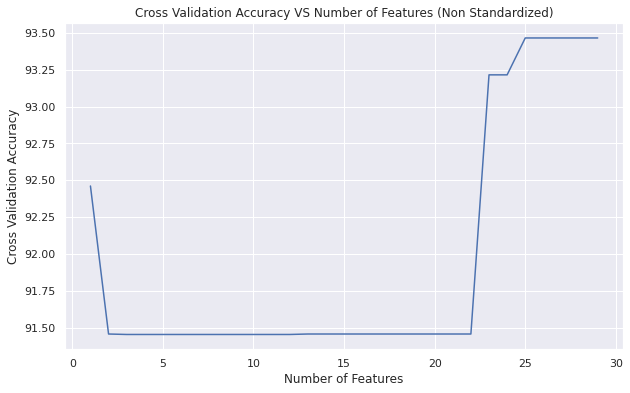

Removed Features:  ['mean radius', 'mean texture', 'compactness error', 'concavity error', 'smoothness error', 'mean perimeter', 'concave points error', 'mean area', 'symmetry error', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'worst fractal dimension', 'mean fractal dimension', 'texture error', 'perimeter error', 'worst perimeter', 'worst compactness', 'worst radius', 'worst smoothness', 'radius error', 'worst texture', 'fractal dimension error', 'mean symmetry', 'worst symmetry', 'worst concavity', 'area error', 'worst area'] 
Cross validation accuracy:  [93.46518987341771, 93.46518987341771, 93.46518987341771, 93.46518987341771, 93.46518987341771, 93.21518987341773, 93.21518987341773, 91.45886075949366, 91.45886075949366, 91.45886075949366, 91.45886075949366, 91.45886075949366, 91.45886075949366, 91.45886075949366, 91.45886075949366, 91.45886075949366, 91.45886075949366, 91.45569620253164, 91.45569620253164, 91.45569620253164, 91.45569620253164, 

In [ ]:
## Plotting the graph for Cross Validation Accuracy w.r.t. no of features ##

fig = plt.figure(figsize=(10, 6))
plt.plot(Train_1[3], Train_1[0])
plt.title("Cross Validation Accuracy VS Number of Features (Non Standardized)")
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Number of Features")
plt.show()


print("Removed Features: ", Train_1[2],"\nCross validation accuracy: ", Train_1[0])
# Get index for Max cross validation value
i_max_cv_Train_1 =Train_1[0].index(max(Train_1[0]))
print("Max Cross validation:",max(Train_1[0]),"%","with",len(Train_1[0][i_max_cv_Train_1 :]),"features")

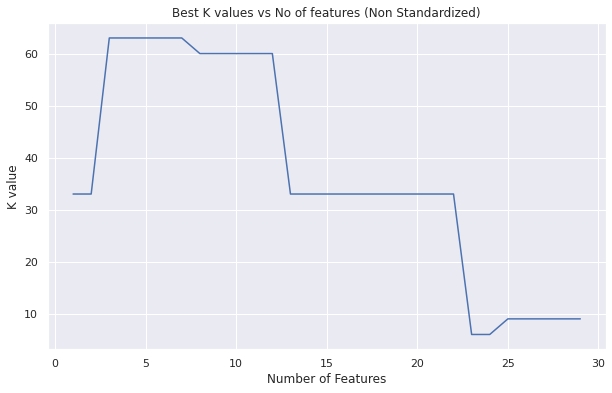

In [ ]:
## Plotting the graph for Best K values w.r.t. no of features ##

fig = plt.figure(figsize=(10, 6))
plt.plot(Train_1[3], Train_1[1])
plt.title("Best K values vs No of features (Non Standardized)")
plt.ylabel("K value")
plt.xlabel("Number of Features")
plt.show()

## Part 4: Standardization

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**


**Answer 3 : It is observed that standardization significantly improves the cros validation accuracy of the model. With original data we could the accuracy of 93.456 % and K = 9 with all features included, after standardization this figure changes to 96.74 % with K = 7. Also by using the decision tree to eliminate less important features the maximum cross validation is found to be 96.99 % and K = 5,with total of 19 features remaining (removed features enlisted below)[1] out of originally 30 features in dataset.**

In [ ]:
### We normalize the data and run the Feature selector ###
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### Standardizing training and test data ###

scaler.fit(X_train_data)
X_train_data_norm = pd.DataFrame(scaler.fit_transform(X_train_data), columns=X_train_data.columns)
X_test_data_norm = pd.DataFrame(scaler.transform(X_test_data), columns=X_test_data.columns)      # Test data is transformed for final testing

# Applying Feature selector of standardized data #
Train_Norm = Feature_selector (X_train_data_norm,Y_train_labels,0.95)
print("\nRemoved Features: ", Train_Norm[2],"\nCross validation accuracy: ", Train_Norm[0])

Maximum Cross validation accuracy using all features is: 96.74367088607593 % for K: 9
After removing feature : mean radius  , highest cross-validation accuracy is: 96.49683544303798  % , for K : 7  and no. of feature left  29
After removing feature : mean texture  , highest cross-validation accuracy is: 96.23417721518986  % , for K : 3  and no. of feature left  28
After removing feature : compactness error  , highest cross-validation accuracy is: 96.23734177215188  % , for K : 2  and no. of feature left  27
After removing feature : concavity error  , highest cross-validation accuracy is: 96.4873417721519  % , for K : 2  and no. of feature left  26
After removing feature : smoothness error  , highest cross-validation accuracy is: 96.49050632911391  % , for K : 7  and no. of feature left  25
After removing feature : mean perimeter  , highest cross-validation accuracy is: 96.48417721518987  % , for K : 2  and no. of feature left  24
After removing feature : concave points error  , highest

<Figure size 432x288 with 0 Axes>

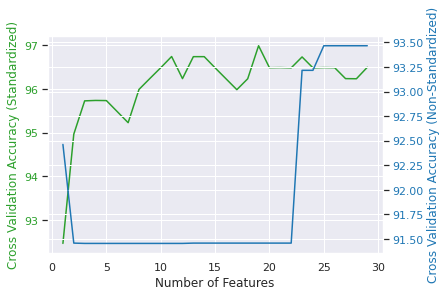

In [ ]:
### Plotting CV Accuracy at Original and Standardized training data VS Number of Features left ###

fig = plt.figure()
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('Cross Validation Accuracy (Standardized)', color=color)
ax1.plot(Train_Norm[3],Train_Norm[0], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Cross Validation Accuracy (Non-Standardized)', color=color)  
ax2.plot(Train_1[3],Train_1[0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

In [ ]:
# Get index for Max cross validation value
i_max_cv_Train_Norm =Train_Norm[0].index(max(Train_Norm[0]))
print("Max Cross validation:",max(Train_Norm[0]),"%","with",len(Train_Norm[0][i_max_cv_Train_Norm :]),"features")

# Get list of features to be removed from dataset for validation
features_to_remove = Train_Norm[2][0:((index_for_max_cv_Train_Norm)+1)]
print("[1] Features_to_remove :",features_to_remove)

# Best value for K at max cross validation
Best_K = Train_Norm[1][i_max_cv_Train_Norm]
print("Best K = ",Best_K)

Max Cross validation: 96.99050632911393 % with 19 features
[1] Features_to_remove : ['mean radius', 'mean texture', 'compactness error', 'concavity error', 'smoothness error', 'mean perimeter', 'concave points error', 'mean area', 'symmetry error', 'mean smoothness', 'mean compactness']
Best K =  5


## Part 5: Test Data

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

In [ ]:
### YOUR CODE HERE ###

from sklearn.metrics import accuracy_score

X_train_data_norm_final = X_train_data_norm.drop(features_to_remove,axis=1)
X_test_data_norm_final = X_test_data_norm.drop(features_to_remove,axis=1)


knn_final = neighbors.KNeighborsClassifier(n_neighbors = Best_K)    # Taking best value of K

knn_final.fit(X_train_data_norm_final, Y_train_labels)  # Training model with finalized data

accuracy = accuracy_score(Y_test_labels, knn_final.predict(X_test_data_norm_final)) # Running pediction and calculating accuracy for test data
print("Final Accuracy with test data, X_test_data_norm_final : ", accuracy * 100, "%")
print("Best K = ",Best_K)

Final Accuracy with test data, X_test_data_norm_final :  95.32163742690058 %
Best K =  5


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/